# Loading and Basic Text Extraction

In [1]:
#%pip install "natural-pdf[all]"

In this tutorial, we'll learn how to:

1. Load a PDF document
2. Extract text from pages
3. Extract specific elements 

## Loading a PDF

Let's start by loading a PDF file:

In [2]:
from natural_pdf import PDF
import os

# Load a PDF file
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")

# Basic info about the document
{
    "Filename": os.path.basename(pdf.path),
    "Pages": len(pdf.pages),
    "Title": pdf.metadata.get("Title", "N/A"),
    "Author": pdf.metadata.get("Author", "N/A")
}

CropBox missing from /Page, defaulting to MediaBox


{'Filename': 'tmpulp9521w.pdf', 'Pages': 1, 'Title': 'N/A', 'Author': 'N/A'}

## Extracting Text

Now that we have loaded the PDF, let's extract the text from the first page:

In [3]:
# Get the first page
page = pdf.pages[0]

# Extract text from the page
text = page.extract_text()

# Show the first 200 characters of the text
print(text[:200])

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men


## Finding and Extracting Specific Elements

We can find specific elements using spatial queries and text content:

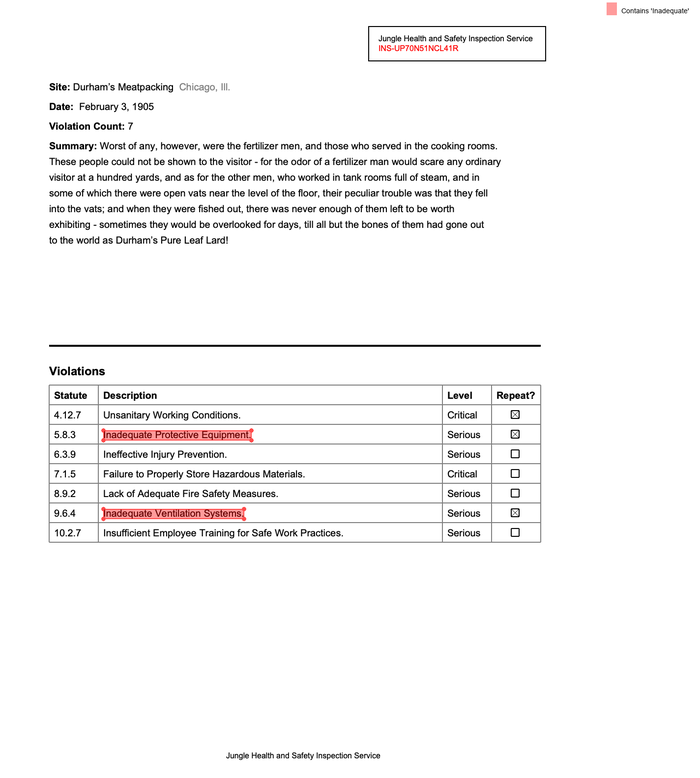

In [4]:
# Find text elements containing specific words
elements = page.find_all('text:contains("Inadequate")')

# Show these elements on the page
page.clear_highlights()
elements.highlight(color="red", label="Contains 'Inadequate'")

# Display the page to see them
page.to_image(width=700)

## Working with Layout Regions

We can analyze the layout of the page to identify different regions:

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmp24wqvwff/temp_layout_image.png: 1024x800 1 title, 3 plain texts, 2 abandons, 1 table, 646.0ms


Speed: 4.8ms preprocess, 646.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 800)


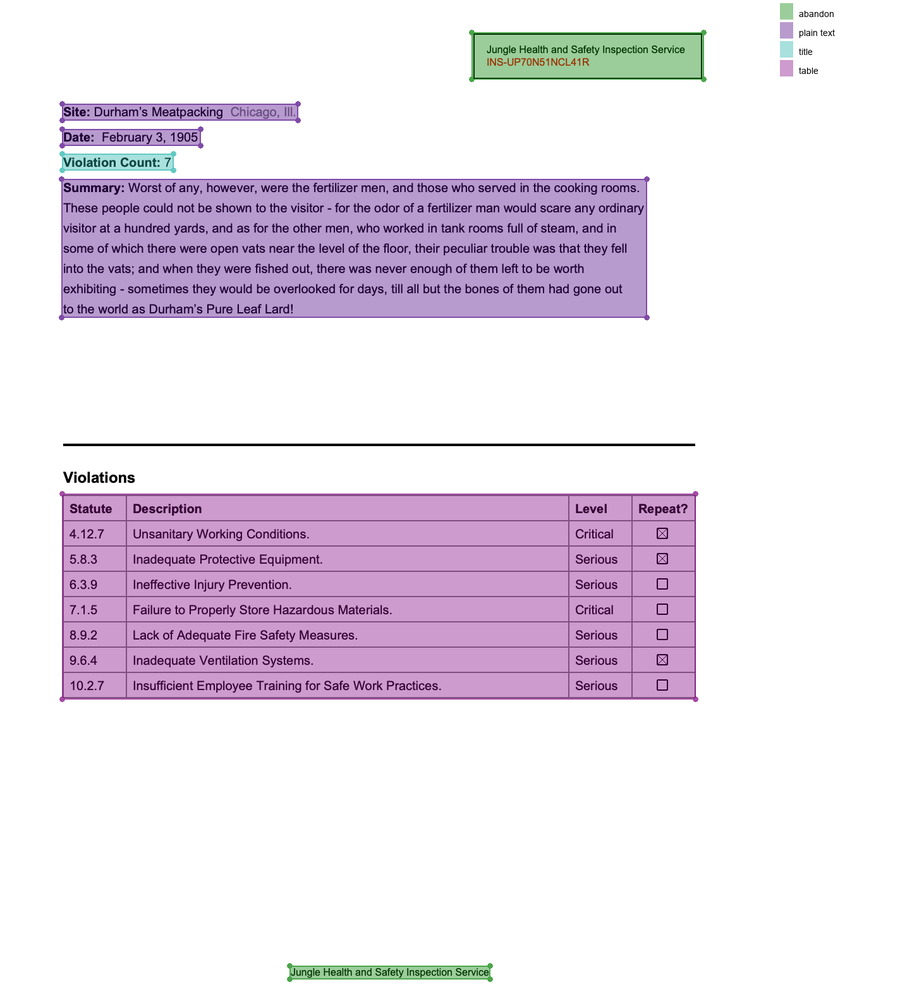

In [5]:
# Analyze the page layout
page.analyze_layout(engine='yolo')

# Find and highlight all detected regions
page.clear_highlights()
page.find_all('region').highlight(group_by='type')

# Display the page to see the regions
page.to_image(width=900)

## Working with Multiple Pages

You can also work with multiple pages:

In [6]:
# Process all pages
for page in pdf.pages:
    page_text = page.extract_text()
    print(f"Page {page.number}", page_text[:100])  # First 100 chars of each page

Page 1 Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Il


This tutorial covered the basics of loading PDFs and extracting text. In the next tutorials, we'll explore more advanced features like searching for specific elements, extracting structured content, and working with tables. 

In [7]:
%%bash
pip install "natural-pdf[all]"

hon3.11/site-packages (0.1.12.dev9+g83a6dbde.d20250515)


1/site-packages (from natural-pdf[all]) (0.11.6)

a/Development/natural-pdf/.venv/lib/python3.11/site-packages (from natural-pdf[all]) (10.4.0)
Requir

ement already satisfied: colour in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-pac

kages (from natural-pdf[all]) (0.1.5)

t/natural-pdf/.venv/lib/python3.11/site-packages (from natural-pdf[all]) (2.2.5)


ite-packages (from natural-pdf[all]) (2.4.0)

lopment/natural-pdf/.venv/lib/python3.11/site-packages (from natural-pdf[all]) (4.67.1)
Requirement 

already satisfied: pydantic in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-package

s (from natural-pdf[all]) (2.11.4)

/natural-pdf/.venv/lib/python3.11/site-packages (from natural-pdf[all]) (0.4.1)
Requirement already 

satisfied: pikepdf>=9.7.0 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages 

(from natural-pdf[all]) (9.7.0)


1/site-packages (from pikepdf>=9.7.0->natural-pdf[all]) (1.2.18)


/site-packages (from pikepdf>=9.7.0->natural-pdf[all]) (5.4.0)

ing in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from pikepdf>=9.7.0->

natural-pdf[all]) (25.0)


n3.11/site-packages (from Deprecated->pikepdf>=9.7.0->natural-pdf[all]) (1.17.2)


e-packages (from natural-pdf[all]) (2.7.0)


11/site-packages (from natural-pdf[all]) (0.22.0)


env/lib/python3.11/site-packages (from natural-pdf[all]) (4.51.3)

gingface_hub in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from natural

-pdf[all]) (0.31.2)


b/python3.11/site-packages (from natural-pdf[all]) (4.1.0)

sers/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from natural-pdf[all]) (1.0.15

)


site-packages (from huggingface_hub->natural-pdf[all]) (3.18.0)

c>=2023.5.0 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from huggingf

ace_hub->natural-pdf[all]) (2025.3.2)

lopment/natural-pdf/.venv/lib/python3.11/site-packages (from huggingface_hub->natural-pdf[all]) (6.0

.2)

.11/site-packages (from huggingface_hub->natural-pdf[all]) (2.32.3)


nv/lib/python3.11/site-packages (from huggingface_hub->natural-pdf[all]) (4.13.2)


11/site-packages (from natural-pdf[all]) (1.5.1)


ite-packages (from natural-pdf[all]) (0.6.1)


.11/site-packages (from deskew>=1.5->natural-pdf[all]) (0.25.2)


ite-packages (from natural-pdf[all]) (2.32.0)


.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (4.13.4)


thon3.11/site-packages (from docling->natural-pdf[all]) (2025.4.26)


11/site-packages (from docling->natural-pdf[all]) (8.1.8)


env/lib/python3.11/site-packages (from docling-core[chunking]<3.0.0,>=2.26.0->docling->natural-pdf[a

ll]) (2.30.1)


df/.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (3.4.3)


env/lib/python3.11/site-packages (from docling->natural-pdf[all]) (4.0.1)
Requirement already satisf

ied: easyocr<2.0,>=1.7 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (fr

om docling->natural-pdf[all]) (1.7.2)

s/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (

1.2.0)


python3.11/site-packages (from docling->natural-pdf[all]) (2.1.3)

npyxl<4.0.0,>=3.1.5 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from 

docling->natural-pdf[all]) (3.1.5)

a/Development/natural-pdf/.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (2.2.3

)


/python3.11/site-packages (from docling->natural-pdf[all]) (1.5.0)

dantic-settings<3.0.0,>=2.3.0 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packa

ges (from docling->natural-pdf[all]) (2.9.1)

 /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from docling->natural-pdf[a

ll]) (2.10)

al-pdf/.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (4.30.0)


v/lib/python3.11/site-packages (from docling->natural-pdf[all]) (1.1.2)
Requirement already satisfie

d: python-pptx<2.0.0,>=1.0.2 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packag

es (from docling->natural-pdf[all]) (1.0.2)

sers/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]

) (1.4.0)

.venv/lib/python3.11/site-packages (from docling->natural-pdf[all]) (1.15.3)


b/python3.11/site-packages (from docling->natural-pdf[all]) (0.15.4)


3.11/site-packages (from beautifulsoup4<5.0.0,>=4.12.3->docling->natural-pdf[all]) (2.7)


b/python3.11/site-packages (from docling-core<3.0.0,>=2.26.0->docling-core[chunking]<3.0.0,>=2.26.0-

>docling->natural-pdf[all]) (1.1.0)


v/lib/python3.11/site-packages (from docling-core<3.0.0,>=2.26.0->docling-core[chunking]<3.0.0,>=2.2

6.0->docling->natural-pdf[all]) (4.23.0)

in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from docling-core<3.0.0,>

=2.26.0->docling-core[chunking]<3.0.0,>=2.26.0->docling->natural-pdf[all]) (3.78.0)


lib/python3.11/site-packages (from docling-core<3.0.0,>=2.26.0->docling-core[chunking]<3.0.0,>=2.26.

0->docling->natural-pdf[all]) (0.9.0)


ib/python3.11/site-packages (from docling-core[chunking]<3.0.0,>=2.26.0->docling->natural-pdf[all]) 

(2.2.2)


lib/python3.11/site-packages (from docling-ibm-models<4.0.0,>=3.4.0->docling->natural-pdf[all]) (3.1

.0)


natural-pdf/.venv/lib/python3.11/site-packages (from docling-ibm-models<4.0.0,>=3.4.0->docling->natu

ral-pdf[all]) (4.11.0.86)


b/python3.11/site-packages (from safetensors[torch]<1,>=0.4.3->docling-ibm-models<4.0.0,>=3.4.0->doc

ling->natural-pdf[all]) (0.5.3)


11/site-packages (from easyocr<2.0,>=1.7->docling->natural-pdf[all]) (0.6.6)


ite-packages (from easyocr<2.0,>=1.7->docling->natural-pdf[all]) (2.1.0)
Requirement already satisfi

ed: pyclipper in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from easyoc

r<2.0,>=1.7->docling->natural-pdf[all]) (1.3.0.post6)


e-packages (from easyocr<2.0,>=1.7->docling->natural-pdf[all]) (1.11.1.4)


3.11/site-packages (from jsonlines<4.0.0,>=3.1.0->docling-ibm-models<4.0.0,>=3.4.0->docling->natural

-pdf[all]) (25.3.0)


al-pdf/.venv/lib/python3.11/site-packages (from jsonschema<5.0.0,>=4.16.0->docling-core<3.0.0,>=2.26

.0->docling-core[chunking]<3.0.0,>=2.26.0->docling->natural-pdf[all]) (2025.4.1)


python3.11/site-packages (from jsonschema<5.0.0,>=4.16.0->docling-core<3.0.0,>=2.26.0->docling-core[

chunking]<3.0.0,>=2.26.0->docling->natural-pdf[all]) (0.36.2)


n3.11/site-packages (from jsonschema<5.0.0,>=4.16.0->docling-core<3.0.0,>=2.26.0->docling-core[chunk

ing]<3.0.0,>=2.26.0->docling->natural-pdf[all]) (0.24.0)


1/site-packages (from openpyxl<4.0.0,>=3.1.5->docling->natural-pdf[all]) (2.0.0)


ib/python3.11/site-packages (from pandas<3.0.0,>=2.1.4->docling->natural-pdf[all]) (2.9.0.post0)


.11/site-packages (from pandas<3.0.0,>=2.1.4->docling->natural-pdf[all]) (2025.2)


n3.11/site-packages (from pandas<3.0.0,>=2.1.4->docling->natural-pdf[all]) (2025.2)


ib/python3.11/site-packages (from pydantic->natural-pdf[all]) (0.7.0)


b/python3.11/site-packages (from pydantic->natural-pdf[all]) (2.33.2)


/lib/python3.11/site-packages (from pydantic->natural-pdf[all]) (0.4.0)


b/python3.11/site-packages (from pydantic-settings<3.0.0,>=2.3.0->docling->natural-pdf[all]) (1.1.0)

thon3.11/site-packages (from python-pptx<2.0.0,>=1.0.2->docling->natural-pdf[all]) (3.2.3)


/lib/python3.11/site-packages (from requests->huggingface_hub->natural-pdf[all]) (3.4.2)


.11/site-packages (from requests->huggingface_hub->natural-pdf[all]) (3.10)


11/site-packages (from semchunk<3.0.0,>=2.2.0->docling-core[chunking]<3.0.0,>=2.26.0->docling->natur

al-pdf[all]) (2.10.2)


3.11/site-packages (from torch->natural-pdf[all]) (1.14.0)


site-packages (from torch->natural-pdf[all]) (3.4.2)

/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from torch->natural-pdf[all]) (3.1

.6)


thon3.11/site-packages (from transformers[sentencepiece]->natural-pdf[all]) (2024.11.6)


ib/python3.11/site-packages (from transformers[sentencepiece]->natural-pdf[all]) (0.21.1)


ython3.11/site-packages (from typer<0.16.0,>=0.12.5->docling->natural-pdf[all]) (1.5.4)


3.11/site-packages (from typer<0.16.0,>=0.12.5->docling->natural-pdf[all]) (14.0.0)


site-packages (from python-dateutil>=2.8.2->pandas<3.0.0,>=2.1.4->docling->natural-pdf[all]) (1.17.0

)


b/python3.11/site-packages (from rich>=10.11.0->typer<0.16.0,>=0.12.5->docling->natural-pdf[all]) (3

.0.0)


lib/python3.11/site-packages (from rich>=10.11.0->typer<0.16.0,>=0.12.5->docling->natural-pdf[all]) 

(2.19.1)


1/site-packages (from markdown-it-py>=2.2.0->rich>=10.11.0->typer<0.16.0,>=0.12.5->docling->natural-

pdf[all]) (0.1.2)


ython3.11/site-packages (from sympy>=1.13.3->torch->natural-pdf[all]) (1.3.0)


on3.11/site-packages (from jinja2->torch->natural-pdf[all]) (3.0.2)


b/python3.11/site-packages (from mpire[dill]->semchunk<3.0.0,>=2.2.0->docling-core[chunking]<3.0.0,>

=2.26.0->docling->natural-pdf[all]) (0.70.18)


11/site-packages (from multiprocess>=0.70.15->mpire[dill]->semchunk<3.0.0,>=2.2.0->docling-core[chun

king]<3.0.0,>=2.26.0->docling->natural-pdf[all]) (0.4.0)


python3.11/site-packages (from natural-pdf[all]) (0.11.0)


n3.11/site-packages (from natural-pdf[all]) (0.0.3)


thon3.11/site-packages (from doclayout_yolo->natural-pdf[all]) (3.10.3)


/python3.11/site-packages (from doclayout_yolo->natural-pdf[all]) (4.11.0.86)


te-packages (from doclayout_yolo->natural-pdf[all]) (7.0.0)


1/site-packages (from doclayout_yolo->natural-pdf[all]) (9.0.0)

=0.1.1 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from doclayout_yol

o->natural-pdf[all]) (0.1.1.post2209072238)


on3.11/site-packages (from doclayout_yolo->natural-pdf[all]) (0.13.2)

 albumentations>=1.4.11 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (f

rom doclayout_yolo->natural-pdf[all]) (2.0.6)


hon3.11/site-packages (from albumentations>=1.4.11->doclayout_yolo->natural-pdf[all]) (0.0.24)


python3.11/site-packages (from albucore==0.0.24->albumentations>=1.4.11->doclayout_yolo->natural-pdf

[all]) (3.12.5)


n3.11/site-packages (from albucore==0.0.24->albumentations>=1.4.11->doclayout_yolo->natural-pdf[all]

) (6.2.1)


hon3.11/site-packages (from matplotlib>=3.3.0->doclayout_yolo->natural-pdf[all]) (1.3.2)


.11/site-packages (from matplotlib>=3.3.0->doclayout_yolo->natural-pdf[all]) (0.12.1)


thon3.11/site-packages (from matplotlib>=3.3.0->doclayout_yolo->natural-pdf[all]) (4.58.0)
Requireme

nt already satisfied: kiwisolver>=1.3.1 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/

site-packages (from matplotlib>=3.3.0->doclayout_yolo->natural-pdf[all]) (1.4.8)


hon3.11/site-packages (from matplotlib>=3.3.0->doclayout_yolo->natural-pdf[all]) (3.2.3)


11/site-packages (from natural-pdf[all]) (1.78.1)


on3.11/site-packages (from openai>=1.0->natural-pdf[all]) (4.9.0)


hon3.11/site-packages (from openai>=1.0->natural-pdf[all]) (1.9.0)


hon3.11/site-packages (from openai>=1.0->natural-pdf[all]) (0.28.1)

iter<1,>=0.4.0 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages (from opena

i>=1.0->natural-pdf[all]) (0.9.0)


ite-packages (from openai>=1.0->natural-pdf[all]) (1.3.1)


3.11/site-packages (from httpx<1,>=0.23.0->openai>=1.0->natural-pdf[all]) (1.0.9)


/site-packages (from httpcore==1.*->httpx<1,>=0.23.0->openai>=1.0->natural-pdf[all]) (0.16.0)


.11/site-packages (from natural-pdf[all]) (3.0.0)


/site-packages (from natural-pdf[all]) (2.10.0)


ite-packages (from natural-pdf[all]) (0.22.0)


ite-packages (from natural-pdf[all]) (20.0.0)


11/site-packages (from lancedb->natural-pdf[all]) (2.1.0)


n3.11/site-packages (from lancedb->natural-pdf[all]) (7.7.0)


/site-packages (from natural-pdf[all]) (0.14.0)


te-packages (from natural-pdf[all]) (8.3.5)


/lib/python3.11/site-packages (from natural-pdf[all]) (8.1.7)


11/site-packages (from ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (0.2.2)


n3.11/site-packages (from ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (9.2.0)


hon3.11/site-packages (from ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (5.14.3)
Requirement already

 satisfied: widgetsnbextension~=4.0.14 in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/s

ite-packages (from ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (4.0.14)


nv/lib/python3.11/site-packages (from ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (3.0.15)


/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (5.2.1)


lib/python3.11/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (1.1.

1)


1/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (0.19.2)
Requireme

nt already satisfied: matplotlib-inline in /Users/soma/Development/natural-pdf/.venv/lib/python3.11/

site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (0.1.7)


11/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (4.9.0)
Requireme

nt already satisfied: prompt_toolkit<3.1.0,>=3.0.41 in /Users/soma/Development/natural-pdf/.venv/lib

/python3.11/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (3.0.51)

11/site-packages (from ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) (0.6.3)


ite-packages (from prompt_toolkit<3.1.0,>=3.0.41->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-

pdf[all]) (0.2.13)


python3.11/site-packages (from jedi>=0.16->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all

]) (0.8.4)


on3.11/site-packages (from pexpect>4.3->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) 

(0.7.0)


-packages (from paddleocr->natural-pdf[all]) (1.6.2)


/site-packages (from paddleocr->natural-pdf[all]) (3.13.0)


b/python3.11/site-packages (from paddleocr->natural-pdf[all]) (4.11.0.86)


te-packages (from paddleocr->natural-pdf[all]) (3.1.0)


11/site-packages (from paddleocr->natural-pdf[all]) (0.7.0)


/site-packages (from fire>=0.3.0->paddleocr->natural-pdf[all]) (3.1.0)


hon3.11/site-packages (from paddlepaddle->natural-pdf[all]) (6.31.0)


e-packages (from paddlepaddle->natural-pdf[all]) (0.8.1)


thon3.11/site-packages (from paddlepaddle->natural-pdf[all]) (3.3.0)


ib/python3.11/site-packages (from pdfplumber->natural-pdf[all]) (20250327)


/python3.11/site-packages (from pdfminer.six==20250327->pdfplumber->natural-pdf[all]) (44.0.3)


1/site-packages (from cryptography>=36.0.0->pdfminer.six==20250327->pdfplumber->natural-pdf[all]) (1

.17.1)


/site-packages (from cffi>=1.12->cryptography>=36.0.0->pdfminer.six==20250327->pdfplumber->natural-p

df[all]) (2.22)


/site-packages (from pytest->natural-pdf[all]) (2.1.0)


ython3.11/site-packages (from python-doctr[torch]; extra == "doctr"->natural-pdf[all]) (3.13.0)


/lib/python3.11/site-packages (from python-doctr[torch]; extra == "doctr"->natural-pdf[all]) (1.0.9)

thon3.11/site-packages (from python-doctr[torch]; extra == "doctr"->natural-pdf[all]) (0.7.1)


on3.11/site-packages (from python-doctr[torch]; extra == "doctr"->natural-pdf[all]) (0.3.2)


python3.11/site-packages (from python-doctr[torch]; extra == "doctr"->natural-pdf[all]) (1.18.0)


ib/python3.11/site-packages (from scikit-image->deskew>=1.5->natural-pdf[all]) (2.37.0)


python3.11/site-packages (from scikit-image->deskew>=1.5->natural-pdf[all]) (2025.5.10)


hon3.11/site-packages (from scikit-image->deskew>=1.5->natural-pdf[all]) (0.4)


.11/site-packages (from sentence-transformers->natural-pdf[all]) (1.6.1)


3.11/site-packages (from scikit-learn->sentence-transformers->natural-pdf[all]) (1.5.0)


/python3.11/site-packages (from scikit-learn->sentence-transformers->natural-pdf[all]) (3.6.0)


hon3.11/site-packages (from stack_data->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) 

(2.2.0)


hon3.11/site-packages (from stack_data->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all]) 

(3.0.0)

thon3.11/site-packages (from stack_data->ipython>=6.1.0->ipywidgets<9.0.0,>=7.0.0->natural-pdf[all])

 (0.2.3)


/python3.11/site-packages (from surya-ocr->natural-pdf[all]) (0.8.1)


nv/lib/python3.11/site-packages (from surya-ocr->natural-pdf[all]) (4.3.8)


/lib/python3.11/site-packages (from surya-ocr->natural-pdf[all]) (4.2.0)


11/site-packages (from pre-commit<5.0.0,>=4.2.0->surya-ocr->natural-pdf[all]) (3.4.0)


on3.11/site-packages (from pre-commit<5.0.0,>=4.2.0->surya-ocr->natural-pdf[all]) (2.6.10)


on3.11/site-packages (from pre-commit<5.0.0,>=4.2.0->surya-ocr->natural-pdf[all]) (1.9.1)


python3.11/site-packages (from pre-commit<5.0.0,>=4.2.0->surya-ocr->natural-pdf[all]) (20.31.2)


thon3.11/site-packages (from virtualenv>=20.10.0->pre-commit<5.0.0,>=4.2.0->surya-ocr->natural-pdf[a

ll]) (0.3.9)


/.venv/lib/python3.11/site-packages (from transformers[sentencepiece]; extra == "core-ml"->natural-p

df[all]) (0.2.0)
